In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from unidecode import unidecode
import folium

In [3]:
def eliminar_acentos(texto):
    return unidecode(texto)

In [6]:
Muni = pd.read_csv('LocCost.csv',encoding='latin1')
ferti = pd.read_csv('Fertilizantes.csv',encoding='latin1')
infoc=pd.read_csv('Fertilizantes.csv',encoding='latin1')
cultiv = pd.read_csv('Cultivos4.csv', encoding='latin1') 

C:\Users\josea\AppData\Local\Temp\ipykernel_20828\94975292.py:4: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  cultiv = pd.read_csv('Cultivos4.csv', encoding='latin1')


In [4]:
infoc

NameError: name 'infoc' is not defined

In [6]:
ferti2

Cultivo  Idcultivo  Fertilizante N (kg/ha)
0               Maíz grano    7490000                     800
1              Trigo grano    9050000                     280
2                   Frijol    6840000                     100
3              Sorgo grano    8810000                     190
4           Garbanzo grano    6900000                      18
5       Alfalfa achicalada    5160000                      24
6            Algodón hueso    5190000                     375
7                     Papa    8100000                     110
8                  Manzana    7580000                     120
9           Caña de azúcar    5820000                     170
10             Chile verde    6120000                     200
11                     Uva    9130000                     160
12  Tomate rojo (jitomate)    8970000                     200
13                   Mango    7560000                      60
14                    Nuez    7960000                      90
15                 Naranja    7850000                     160
16                  Sandía    8710000                     130
17              Calabacita    5740000                     110

In [7]:
ferti2=ferti.copy()
#ferti2["Fertilizante N (kg/ha)"][0]=800

In [8]:
data2=cultiv[cultiv["Idmodalidad"]==1]
data=data2[data2["Idcultivo"].isin(ferti["Idcultivo"].unique())]

In [9]:
infoc_indexed = infoc.set_index('Idcultivo')
data['Fertilizante N (kg/ha)'] = data['Idcultivo'].map(infoc_indexed['Fertilizante N (kg/ha)'])

data["Nin_kg"]=data["Sembrada"]*data["Fertilizante N (kg/ha)"]
data

C:\Users\josea\AppData\Local\Temp\ipykernel_20828\130831123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fertilizante N (kg/ha)'] = data['Idcultivo'].map(infoc_indexed['Fertilizante N (kg/ha)'])
C:\Users\josea\AppData\Local\Temp\ipykernel_20828\130831123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Nin_kg"]=data["Sembrada"]*data["Fertilizante N (kg/ha)"]


Ciclo Agricola  Idestado        Nomestado  Idddr        Nomddr  \
2                2020         2  Baja California      2      Ensenada   
5                2020         2  Baja California      2      Ensenada   
8                2020         2  Baja California      2      Ensenada   
12               2020         2  Baja California      2      Ensenada   
18               2020         2  Baja California      2      Ensenada   
...               ...       ...              ...    ...           ...   
80954            2003        32        Zacatecas    185  Ojo Caliente   
80968            2003        32        Zacatecas    189     Zacatecas   
80969            2003        32        Zacatecas    189     Zacatecas   
80970            2003        32        Zacatecas    189     Zacatecas   
80978            2003        32        Zacatecas    189     Zacatecas   

       Idcader  Nomcader  Idmunicipio Nommunicipio  Idciclo  ...  \
2            2    Tecate            3       Tecate        3  ...   
5            2    Tecate            3       Tecate        3  ...   
8            2    Tecate            3       Tecate        3  ...   
12           3  Ensenada            1     Ensenada        1  ...   
18           3  Ensenada            1     Ensenada        1  ...   
...        ...       ...          ...          ...      ...  ...   
80954        2    Loreto           24       Loreto        3  ...   
80968        1    Calera           32      Morelos        2  ...   
80969        1    Calera           32      Morelos        2  ...   
80970        1    Calera           32      Morelos        2  ...   
80978        1    Calera           32      Morelos        3  ...   

            Nomcultivo Sin Um  Sembrada Cosechada  Siniestrada  \
2          Alfalfa achicalada       8.0       8.0          0.0   
5                     Manzana       3.0       3.0          0.0   
8                         Uva      36.0      36.0          0.0   
12                 Calabacita      28.0      28.0          0.0   
18     Tomate rojo (jitomate)       2.5       2.5          0.0   
...                       ...       ...       ...          ...   
80954                     Uva     115.0      99.0          0.0   
80968                  Frijol     450.0     450.0          0.0   
80969              Maz grano     104.0     104.0          0.0   
80970  Tomate rojo (jitomate)      30.0      30.0          0.0   
80978                 Manzana      30.0      30.0          0.0   

      Volumenproduccion  Rendimiento      Precio  Valor produccion  \
2                113.00        14.13   $2,680.00       $302,840.00   
5                 27.00          9.0   $3,900.00       $105,300.00   
8                106.50         2.96  $15,070.00     $1,604,955.00   
12               837.10         29.9   $5,151.68     $4,312,471.33   
18               213.75         85.5  $35,000.00     $7,481,250.00   
...                 ...          ...         ...               ...   
80954            492.00         4.97   $1,506.10       $741,000.00   
80968            810.00          1.8   $2,900.00     $2,349,000.00   
80969            572.00          5.5   $1,700.00       $972,400.00   
80970           1200.00         40.0   $1,000.00     $1,200,000.00   
80978             57.00          1.9   $4,500.00       $256,500.00   

       Fertilizante N (kg/ha)   Nin_kg  
2                          24    192.0  
5                         120    360.0  
8                         160   5760.0  
12                        110   3080.0  
18                        200    500.0  
...                       ...      ...  
80954                     160  18400.0  
80968                     100  45000.0  
80969                     280  29120.0  
80970                     200   6000.0  
80978                     120   3600.0  

[24722 rows x 26 columns]

In [10]:
data["Idestado"].unique()

array([ 2,  3,  8, 10, 14, 18, 25, 26, 32], dtype=int64)

In [11]:
# Establecer 'Idcultivo' como índice en 'infoc'
infoc_indexed = ferti2.set_index('Idcultivo')

# Filtrar 'data' para obtener solo las filas donde 'Idestado' es 25
data_filtered = data[data["Idestado"] == 25]

# Mapear 'Fertilizante N (kg/ha)' de 'infoc_indexed' a 'data_filtered' usando 'Idcultivo'
data_filtered['Fertilizante N (kg/ha)'] = data_filtered['Idcultivo'].map(infoc_indexed['Fertilizante N (kg/ha)'])

# Calcular 'Nin_kg' multiplicando 'Sembrada' por 'Fertilizante N (kg/ha)' en 'data_filtered'
data_filtered["Nin_kg"] = data_filtered["Sembrada"] * data_filtered["Fertilizante N (kg/ha)"]

# Integrar los resultados de nuevo en el DataFrame original 'data'
data.update(data_filtered)

# Mostrar el DataFrame resultante
data

C:\Users\josea\AppData\Local\Temp\ipykernel_20828\569252390.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Fertilizante N (kg/ha)'] = data_filtered['Idcultivo'].map(infoc_indexed['Fertilizante N (kg/ha)'])
C:\Users\josea\AppData\Local\Temp\ipykernel_20828\569252390.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered["Nin_kg"] = data_filtered["Sembrada"] * data_filtered["Fertilizante N (kg/ha)"]


Ciclo Agricola  Idestado        Nomestado  Idddr        Nomddr  \
2                2020         2  Baja California      2      Ensenada   
5                2020         2  Baja California      2      Ensenada   
8                2020         2  Baja California      2      Ensenada   
12               2020         2  Baja California      2      Ensenada   
18               2020         2  Baja California      2      Ensenada   
...               ...       ...              ...    ...           ...   
80954            2003        32        Zacatecas    185  Ojo Caliente   
80968            2003        32        Zacatecas    189     Zacatecas   
80969            2003        32        Zacatecas    189     Zacatecas   
80970            2003        32        Zacatecas    189     Zacatecas   
80978            2003        32        Zacatecas    189     Zacatecas   

       Idcader  Nomcader  Idmunicipio Nommunicipio  Idciclo  ...  \
2            2    Tecate            3       Tecate        3  ...   
5            2    Tecate            3       Tecate        3  ...   
8            2    Tecate            3       Tecate        3  ...   
12           3  Ensenada            1     Ensenada        1  ...   
18           3  Ensenada            1     Ensenada        1  ...   
...        ...       ...          ...          ...      ...  ...   
80954        2    Loreto           24       Loreto        3  ...   
80968        1    Calera           32      Morelos        2  ...   
80969        1    Calera           32      Morelos        2  ...   
80970        1    Calera           32      Morelos        2  ...   
80978        1    Calera           32      Morelos        3  ...   

            Nomcultivo Sin Um  Sembrada Cosechada  Siniestrada  \
2          Alfalfa achicalada       8.0       8.0          0.0   
5                     Manzana       3.0       3.0          0.0   
8                         Uva      36.0      36.0          0.0   
12                 Calabacita      28.0      28.0          0.0   
18     Tomate rojo (jitomate)       2.5       2.5          0.0   
...                       ...       ...       ...          ...   
80954                     Uva     115.0      99.0          0.0   
80968                  Frijol     450.0     450.0          0.0   
80969              Maz grano     104.0     104.0          0.0   
80970  Tomate rojo (jitomate)      30.0      30.0          0.0   
80978                 Manzana      30.0      30.0          0.0   

      Volumenproduccion  Rendimiento      Precio  Valor produccion  \
2                113.00        14.13   $2,680.00       $302,840.00   
5                 27.00          9.0   $3,900.00       $105,300.00   
8                106.50         2.96  $15,070.00     $1,604,955.00   
12               837.10         29.9   $5,151.68     $4,312,471.33   
18               213.75         85.5  $35,000.00     $7,481,250.00   
...                 ...          ...         ...               ...   
80954            492.00         4.97   $1,506.10       $741,000.00   
80968            810.00          1.8   $2,900.00     $2,349,000.00   
80969            572.00          5.5   $1,700.00       $972,400.00   
80970           1200.00         40.0   $1,000.00     $1,200,000.00   
80978             57.00          1.9   $4,500.00       $256,500.00   

       Fertilizante N (kg/ha)   Nin_kg  
2                          24    192.0  
5                         120    360.0  
8                         160   5760.0  
12                        110   3080.0  
18                        200    500.0  
...                       ...      ...  
80954                     160  18400.0  
80968                     100  45000.0  
80969                     280  29120.0  
80970                     200   6000.0  
80978                     120   3600.0  

[24722 rows x 26 columns]

In [19]:
data[data["Idestado"]==25]

Ciclo Agricola  Idestado Nomestado  Idddr      Nomddr  Idcader  \
1667             2020        25   Sinaloa    133  Los Mochis        2   
1668             2020        25   Sinaloa    133  Los Mochis        2   
1670             2020        25   Sinaloa    133  Los Mochis        2   
1671             2020        25   Sinaloa    133  Los Mochis        2   
1672             2020        25   Sinaloa    133  Los Mochis        2   
...               ...       ...       ...    ...         ...      ...   
79529            2003        25   Sinaloa    138    Mazatln        4   
79530            2003        25   Sinaloa    138    Mazatln        4   
79531            2003        25   Sinaloa    138    Mazatln        4   
79533            2003        25   Sinaloa    138    Mazatln        4   
79541            2003        25   Sinaloa    138    Mazatln        4   

        Nomcader  Idmunicipio Nommunicipio  Idciclo  ...  \
1667   El Fuerte           10    El Fuerte        1  ...   
1668   El Fuerte           10    El Fuerte        1  ...   
1670   El Fuerte           10    El Fuerte        1  ...   
1671   El Fuerte           10    El Fuerte        1  ...   
1672   El Fuerte           10    El Fuerte        1  ...   
...          ...          ...          ...      ...  ...   
79529  Escuinapa            9    Escuinapa        2  ...   
79530  Escuinapa            9    Escuinapa        2  ...   
79531  Escuinapa            9    Escuinapa        2  ...   
79533  Escuinapa            9    Escuinapa        2  ...   
79541  Escuinapa            9    Escuinapa        3  ...   

            Nomcultivo Sin Um  Sembrada Cosechada  Siniestrada  \
1667               Calabacita      1.50      1.50          0.0   
1668              Chile verde     18.44     18.44          0.0   
1670                   Frijol    612.98    612.98          0.0   
1671               Maz grano   5145.95   5145.95          0.0   
1672   Tomate rojo (jitomate)     14.64     14.64          0.0   
...                       ...       ...       ...          ...   
79529              Calabacita     22.00     22.00          0.0   
79530              Maz grano     18.82     18.82          0.0   
79531                  Sanda     45.00     45.00          0.0   
79533             Sorgo grano     47.64     47.64          0.0   
79541                   Mango    576.00    576.00          0.0   

      Volumenproduccion  Rendimiento      Precio  Valor produccion  \
1667              30.95        20.63   $3,804.47       $117,748.35   
1668             470.37        25.51  $13,739.57     $6,462,682.68   
1670            1102.24          1.8  $25,122.18    $27,690,671.68   
1671           62781.00         12.2   $3,587.00   $225,195,447.00   
1672             158.55        10.83   $4,500.00       $713,475.00   
...                 ...          ...         ...               ...   
79529            330.00         15.0   $3,000.00       $990,000.00   
79530            126.09          6.7   $1,600.00       $201,744.00   
79531           1620.00         36.0   $3,500.00     $5,670,000.00   
79533            309.66          6.5   $1,200.00       $371,592.00   
79541           6083.50        10.56   $1,505.20     $9,156,900.00   

       Fertilizante N (kg/ha)     Nin_kg  
1667                      110      165.0  
1668                      200     3688.0  
1670                      100    61298.0  
1671                      280  1440866.0  
1672                      200     2928.0  
...                       ...        ...  
79529                     110     2420.0  
79530                     280     5269.6  
79531                     130     5850.0  
79533                     190     9051.6  
79541                      60    34560.0  

[6958 rows x 26 columns]

In [12]:
cultivos_data = pd.DataFrame(columns=data.columns)
frames_temporales = []

for entidad in Muni['ENTIDAD'].unique():
    bb = Muni[Muni["ENTIDAD"] == entidad]
    dd1 = data[data["Idestado"].isin(bb["ENTIDAD"].unique())]    
    for Mun in bb["MUN"].unique():
        c = bb[bb["MUN"] == Mun]
        dd2 = dd1[dd1["Idmunicipio"].isin(c["MUN"].unique())]  
        frames_temporales.append(dd2)

# Concatenar todos los DataFrames al final
cultivos_data = pd.concat(frames_temporales, ignore_index=True)

In [25]:
cultivos_data.to_csv("datoscultivos.csv")

In [14]:
cultivos_data_2020 = cultivos_data[cultivos_data['Ciclo Agricola'] == 2020]

In [27]:
cultivos_data_2020[cultivos_data_2020['Idcultivo']== 7490000]

Ciclo Agricola  Idestado        Nomestado  Idddr        Nomddr  \
14               2020         2  Baja California      2      Ensenada   
447              2020         2  Baja California      3  Ro Colorado   
456              2020         2  Baja California      3  Ro Colorado   
464              2020         2  Baja California      3  Ro Colorado   
471              2020         2  Baja California      3  Ro Colorado   
...               ...       ...              ...    ...           ...   
10766            2020        26           Sonora    148        Cajeme   
11022            2020        26           Sonora    148        Cajeme   
11028            2020        26           Sonora    148        Cajeme   
11036            2020        26           Sonora    148        Cajeme   
11039            2020        26           Sonora    148        Cajeme   

       Idcader       Nomcader  Idmunicipio            Nommunicipio  Idciclo  \
14           4    San Quintn            1                Ensenada        2   
447          1      Hechicera            2                Mexicali        2   
456          2  Benito Jurez            2                Mexicali        2   
464          4   Cerro Prieto            2                Mexicali        2   
471          5    G. Victoria            2                Mexicali        1   
...        ...            ...          ...                     ...      ...   
10766        2   Villa Jurez           71           Benito Juarez        1   
11022        3          Bcum           72  San Ignacio Rio Muerto        1   
11028        3          Bcum           72  San Ignacio Rio Muerto        2   
11036        4   Pueblo Yaqui           72  San Ignacio Rio Muerto        1   
11039        4   Pueblo Yaqui           72  San Ignacio Rio Muerto        2   

       ... Nomcultivo Sin Um  Sembrada Cosechada  Siniestrada  \
14     ...        Maz grano      9.00      9.00          0.0   
447    ...        Maz grano    299.85    299.85          0.0   
456    ...        Maz grano    201.00    201.00          0.0   
464    ...        Maz grano    150.00    150.00          0.0   
471    ...        Maz grano    196.72    196.72          0.0   
...    ...               ...       ...       ...          ...   
10766  ...        Maz grano   4816.00   4816.00          0.0   
11022  ...        Maz grano   7470.00   7470.00          0.0   
11028  ...        Maz grano     20.00     20.00          0.0   
11036  ...        Maz grano   1000.00   1000.00          0.0   
11039  ...        Maz grano     50.00     50.00          0.0   

      Volumenproduccion  Rendimiento     Precio  Valor produccion  \
14                45.00          5.0  $5,268.13      2.370659e+05   
447             3448.00         11.5  $4,500.00      1.551600e+07   
456             1744.00         8.68  $4,500.00      7.848000e+06   
464             1440.00          9.6  $4,500.00      6.480000e+06   
471             2417.68        12.29  $4,500.00      1.087956e+07   
...                 ...          ...        ...               ...   
10766          59500.00        12.35  $3,512.02      2.089652e+08   
11022          93000.00        12.45  $3,591.00      3.339630e+08   
11028            156.00          7.8  $4,900.00      7.644000e+05   
11036          11700.00         11.7  $3,781.85      4.424764e+07   
11039            425.00          8.5  $5,022.82      2.134698e+06   

       Fertilizante N (kg/ha)     Nin_kg  
14                        280     2520.0  
447                       280    83958.0  
456                       280    56280.0  
464                       280    42000.0  
471                       280    55081.6  
...                       ...        ...  
10766                     280  1348480.0  
11022                     280  2091600.0  
11028                     280     5600.0  
11036                     280   280000.0  
11039                     280    14000.0  

[88 rows x 26 columns]

In [58]:
cultivos_data['Sembrada'].sum()/18

1171227.1905555555

In [34]:
cultivos_data_2020["Valor produccion"] = (
    cultivos_data_2020["Valor produccion"]
    .replace('[\$,]', '', regex=True)  # Elimina '$' y comas
    .replace(r'^\s*$', np.nan, regex=True)  # Reemplaza espacios vacíos por NaN
    .replace(' -   ', np.nan)  # Reemplaza valores específicos como ' - ' por NaN
    .astype(float)
)

# Calcular la suma, ignorando valores NaN
total_valor_produccion = cultivos_data_2020[cultivos_data_2020['Idcultivo']== 9050000]["Valor produccion"].sum()
print(total_valor_produccion)

8374777671.610001


C:\Users\josea\AppData\Local\Temp\ipykernel_20828\2122413323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultivos_data_2020["Valor produccion"] = (


In [60]:
# Agrupando los datos por 'Ciclo Agrícola', 'Nomcultivo Sin Um' y 'Nommunicipio'
# y sumando la superficie sembrada
grouped_data = cultivos_data.groupby(['Ciclo Agricola', 'Nommunicipio', 'Nomcultivo Sin Um'])['Nin_kg'].sum().reset_index()


# Renombrando las columnas para mayor claridad
grouped_data.columns = ['Ciclo Agrícola','Municipio', 'Cultivo',  'Nin_kg']

# Mostrando las primeras filas del dataframe resultante
data["Nin_kg"].astype(int)
grouped_data["Nin_kg"].sum()/(18*1000)


270676.9363933333

In [42]:
2003-2020

-17

In [61]:
datospormunicipiom=grouped_data.groupby(["Ciclo Agrícola","Municipio"])['Nin_kg'].sum().reset_index()
datospormunicipio=datospormunicipiom.groupby(["Municipio"])['Nin_kg'].mean()
datospormunicipio=datospormunicipio/1000
#datospormunicipio.to_csv("agrimun.csv")

In [62]:
cultt=cultivos_data.groupby('Nomcultivo Sin Um')['Sembrada'].sum()/18
#cultt.to_csv("cultivos.csv")

In [63]:
cultivos_data.groupby('Ciclo Agricola')['Valor produccion'].sum()/1000000

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [64]:
cultivos_data

cultivos_data['Valor produccion'] = cultivos_data['Valor produccion'].str.replace('$', '').str.replace(',', '')

# Paso 2: Reemplazar los strings que no se pueden convertir a flotantes, como ' -   ', con NaN
cultivos_data['Valor produccion'] = pd.to_numeric(cultivos_data['Valor produccion'], errors='coerce')

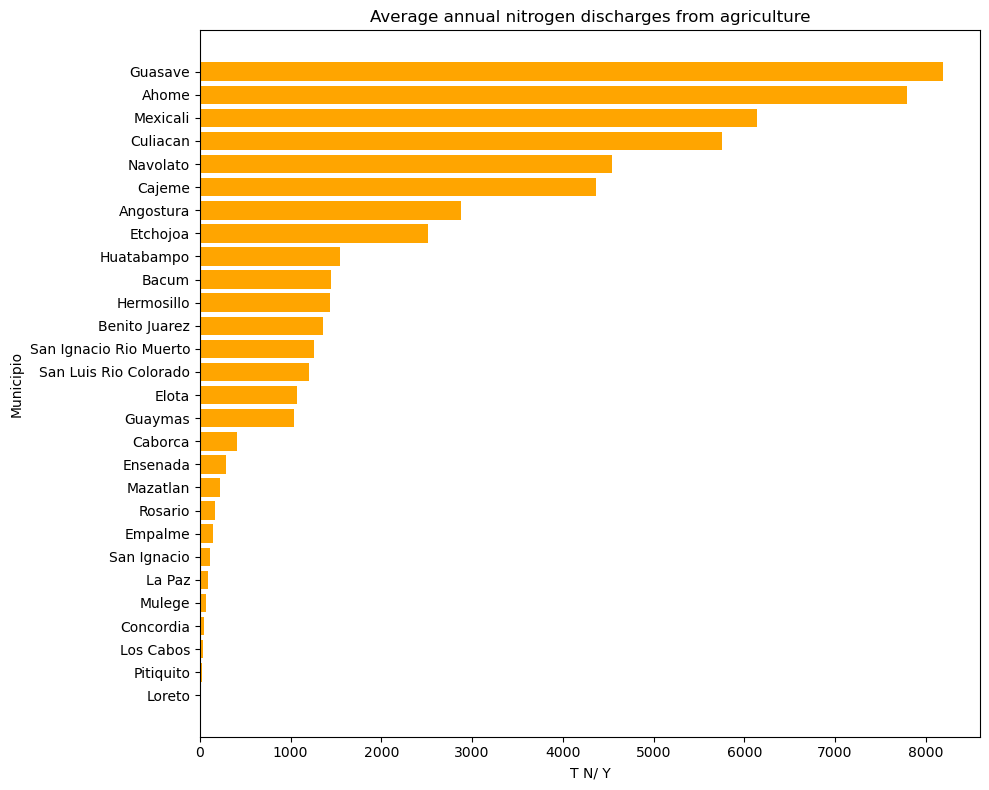

In [65]:

# Agrupar por 'Municipio' y sumar 'Nin_kg'
sum_nin_kg = grouped_data.groupby("Municipio")['Nin_kg'].sum().round(2)/18000

# Ordenar los valores para la gráfica (opcional, para mejorar la visualización)
sum_nin_kg_sorted = sum_nin_kg.sort_values()*.2

# Crear la gráfica de barras horizontales
plt.figure(figsize=(10, 8))  # Ajustar el tamaño según sea necesario
plt.barh(sum_nin_kg_sorted.index, sum_nin_kg_sorted.values, color='orange')  # Puedes cambiar el color
plt.xlabel('T N/ Y')  # Etiqueta para el eje X
plt.ylabel('Municipio')  # Etiqueta para el eje Y
plt.title('Average annual nitrogen discharges from agriculture')  # Título de la gráfica
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()  # Mostrar la gráfica


In [67]:
sum_nin_kg.sum()*.25

67669.23409833333

In [26]:


desired_order = ["Rosario", "Concordia", "Mazatlan", "San Ignacio", "Elota", 
                 "Culiacan", "Navolato", "Angostura", "Guasave", "Ahome", 
                 "Huatabampo", "Etchojoa", "Benito Juarez", "Cajeme", "Bacum", 
                 "San Ignacio Rio Muerto", "Empalme", "Guaymas", "Hermosillo", 
                 "Pitiquito", "Caborca", "San Luis Rio Colorado", 
                 "Mexicali", "Ensenada", "Mulege", "Loreto", "La Paz", "Los Cabos"]

reordered_df = sum_nin_kg .loc[desired_order].reset_index()

reordered_df.to_csv("agricultn.csv")

In [27]:
# Crear un diccionario para almacenar un dataframe por cada municipio
municipios_dataframes = {}

for municipio in grouped_data['Municipio'].unique(4):
    # Filtrar el dataframe para cada municipio
    df_municipio = grouped_data[grouped_data['Municipio'] == municipio]
    
    # Pivotear el dataframe para obtener los cultivos en las filas y los años en las columnas
    pivot_df = df_municipio.pivot(index='Cultivo', columns='Ciclo Agrícola', values='Nin_kg')
    pivot_df["Nin_ton"]=pivot_df.mean(axis=1).astype(int)/1000
    pivot_df=pivot_df.sort_values(by='Nin_ton', ascending=False)
    # Almacenar el dataframe pivotado en el diccionario
    municipios_dataframes[municipio] = pivot_df

# Mostrar el dataframe para el primer municipio como ejemplo
municipio = list(municipios_dataframes.keys())[7]
print(municipio)
print(municipios_dataframes[municipio]["Nin_ton"].sum())
municipios_dataframes[municipio]


TypeError: Series.unique() takes 1 positional argument but 2 were given

In [24]:
gdfs=[]
for muni in cultivos_data['Nommunicipio'].unique():
    a=(muni +".shp")
    riego=gpd.read_file(a)
    riego['Municipio'] = muni
    riego['Nton'] = municipios_dataframes[muni]["Nin_ton"].sum()
    
    gdfs.append(riego)
    print(a)
    

NameError: name 'municipios_dataframes' is not defined

In [17]:
gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

In [18]:
# Convertir el GeoDataFrame a GeoJSON para su uso en Folium
gdf_geojson = gdf.to_json()

# Crear un mapa base
mapa = folium.Map(location=[27.808443625123502, -110.80002095658047], zoom_start=5)  # Reemplaza con las coordenadas deseadas

# Añadir el mapa coroplético
folium.Choropleth(
    geo_data=gdf_geojson,
    name='choropleth',
    data=gdf,
    columns=['Municipio', 'Nton'],  # Asegúrate de reemplazar con tus nombres de columna
    key_on='feature.properties.Municipio',  # Asegúrate de que esto coincida con la columna en tu GeoJSON
    fill_color='YlGn',  # Elige una paleta de colores
    fill_opacity=0.3,
    line_opacity=0.2,
    legend_name='Aportación de N (t)'
).add_to(mapa)

# Añadir un control de capas
folium.LayerControl().add_to(mapa)

# Guardar el mapa en un archivo HTML o mostrarlo en un Jupyter Notebook
mapa.save('mapa_coropletico.html')

mapa

In [19]:
Muni=gpd.read_file("municosteros.shp")
Riego  = gpd.read_file("Riego.shp")

In [20]:
# Crear un mapa base
mapa = folium.Map(location=[27.808443625123502, -110.80002095658047], zoom_start=5)

# Añadir el mapa coroplético
choropleth = folium.Choropleth(
    geo_data=gdf_geojson,
    name='choropleth',
    data=gdf,
    columns=['Municipio', 'Nton'],
    key_on='feature.properties.Municipio',
    fill_color='YlGn',
    fill_opacity=0.3,
    line_opacity=0.2,
    legend_name='Aportación de N (t)'
).add_to(mapa)

# Añadir tooltips
style_function = lambda x: {'fillColor': '#ffffff', 'color': '#000000', 'fillOpacity': 0.1, 'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 'color': '#000000', 'fillOpacity': 0.50, 'weight': 0.1}
gjson = folium.features.GeoJson(
    gdf,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Municipio', 'Nton'],
        aliases=['Municipio: ', 'N(T): '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)
mapa.add_child(gjson)

# Añadir un control de capas
folium.LayerControl().add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_coropletico.html')

# Mostrar el mapa en Jupyter Notebook
mapa

NameError: name 'gdf_concatenado' is not defined

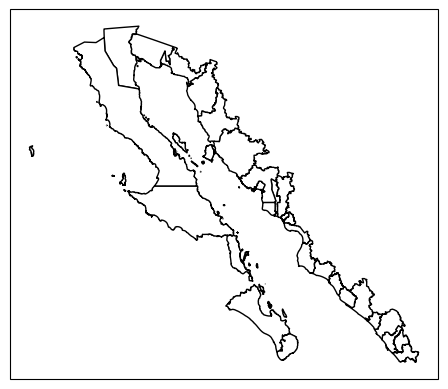

In [21]:
# 
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
Muni.plot(ax=ax, color='white', edgecolor='black', zorder=1)
gdf_concatenado.plot(ax=ax, color='white', edgecolor='green', zorder=1)

In [ ]:
gdf = gpd.read_file("San Ignacio Rio Muerto.shp")

In [ ]:
print(gdf.head())

In [ ]:
import os

# Ruta de la carpeta
ruta_carpeta = 'RiegoMU'

# Lista para almacenar los nombres de los archivos .shp
archivos_shp = []

# Iterar sobre los archivos en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith('.shp'):
        archivos_shp.append(archivo)

# Imprimir los nombres de los archivos .shp
for archivo in archivos_shp:
    print(archivo)


In [ ]:
municip=[]
for nombre_archivo in archivos_shp:
    nombre_sin_extension = os.path.splitext(nombre_archivo)[0]
    municip.append(nombre_sin_extension)
    print(nombre_sin_extension)

In [ ]:

for muni in municip:
    a=eliminar_acentos(muni)
     
    if a in municip:
        print(a)
        print(municipios_dataframes[a]["Nin_ton"].sum())
    